#**TUGAS PRAKTIKUM 03 - MACHINE LEARNING**

Nama  : Imelda Wahyuni

Nim   : 0110222042

Sesi  : Pagi

#**INFORMASI TERKAIT DATASET**

Sistem berbagi sepeda merupakan generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, hingga pengembalian telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan kembali lagi di lokasi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena perannya yang penting dalam isu lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi sistem berbagi sepeda di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Dengan demikian, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.

Informasi Atribut: Baik hour.csv maupun day.csv memiliki kolom berikut, kecuali hr yang tidak tersedia di day.csv.

Kolom Dataset :    
*   instant: indeks rekaman
*   dteday: tanggal
*   season: musim (1:springer, 2:summer, 3:fall, 4:winter)
*   yr: year (0:2011, 1:2012)
*   mnth: bulan (1 hingga 12)
*   r: jam (0 hingga 23)
*   holiday: hari libur atau bukan
*   weekday: hari dalam seminggu
*   workingday: jika hari tersebut bukan akhir pekan atau hari libur, nilainya 1, jika tidak, nilainya 0.
*   Weathersit:

1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut

3: Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar

4: Hujan Lebat + Lapisan Es + Badai Petir + Kabut, Salju + Kabut
*   temp: Suhu normal dalam Celcius. Nilainya diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
*   atemp: Suhu normal dalam Celcius. Nilainya diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam)
*   hum: Kelembapan normal. Nilainya dibagi menjadi 100 (maks)
*   windspeed: Kecepatan angin normal. Nilai dibagi menjadi 67 (maks.)
*  casual: jumlah pengguna kasual
*  registered: jumlah pengguna terdaftar
*   cnt: jumlah total sepeda sewaan, termasuk kasual dan terdaftar











**1. MENGHUBUNGKAN COLAB KE DRIVE**

Cara menghubungkan colab dengan google drive kita bisa melakukan perintah code seperti di bawah ini.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum03"

**2. IMPORT LIBRARY DAN LOAD DATASET**

Kode di bawah ini untuk mengambil dataset CSV dari Google Drive lalu menampilkannya di Google Colab dalam bentuk tabel yang mudah diolah. Serta menampilan seluruh dataset yang ada pada dataset “day.csv”

In [3]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum03/data/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Dari dataset di atas menampilkan table dataset, terdapat 731 baris dan 16 kolom yaitu gender, height weight dan index.

**3. MELIHAT INFORMASI UMUM DATA**


Kode df.info() digunakan untuk melihat informasi umum tentang data yang ada di dalam DataFrame df.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


df.info() di atas menunjukkan informasi struktur DataFrame seperti :
*   Dataset punya 731 baris (entries) dan 16 kolom.
*   Setiap kolom ditampilkan dengan nama, jumlah data yang tidak kosong (Non-Null Count), dan tipe datanya (Dtype).
*   Semua kolom memiliki 731 data non-null, artinya tidak ada nilai yang hilang (missing values).
*   Type data yang ada pada dataset di atas yaitu ada int64, float64, dan object.

**4. MENGHITUNG STATISTIK DESKRIPTIF OTOMATIS**

Kode df.describe() digunakan untuk membuat ringkasan statistik deskriptif dari kolom yang bertipe numerik pada DataFrame

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari hasilnya bisa kita lihat :

*   Dataset berisi 731 data dan tidak ada missing value.
*   Rata-rata suhu (temp): 0.49 → suhu sedang.
*   Rata-rata kelembapan (hum): 0.63 → cukup lembap.
*   Rata-rata kecepatan angin (windspeed): 0.19 → angin relatif tenang.
*   Sebagian besar merupakan hari kerja (68%) dan cuaca baik.
*   Rata-rata total penyewaan sepeda (cnt): 4504 orang per hari.
*   Standar deviasi cnt ≈ 1937, menunjukkan variasi jumlah penyewa cukup besar antar hari.

**5. PEMILIHAN VARIABEL DAN MENGECEK KORELASI ANTAR VARIABEL**

Kode di bawah ini digunakan untuk melihat hubungan atau korelasi antara variabel-variabel dalam dataset. Pertama, library Seaborn dan Matplotlib diimpor untuk membuat dan menampilkan visualisasi. Lalu, variabel y ditetapkan sebagai target yaitu cnt (jumlah penyewaan sepeda), sedangkan X berisi fitur-fitur yang diduga memengaruhi jumlah penyewaan seperti suhu, kelembapan, kecepatan angin, musim, cuaca, tahun, dan hari kerja. Setelah itu, fungsi .corr() digunakan untuk menghitung nilai korelasi antar variabel numerik, dan hasilnya divisualisasikan dalam bentuk heatmap menggunakan sns.heatmap().

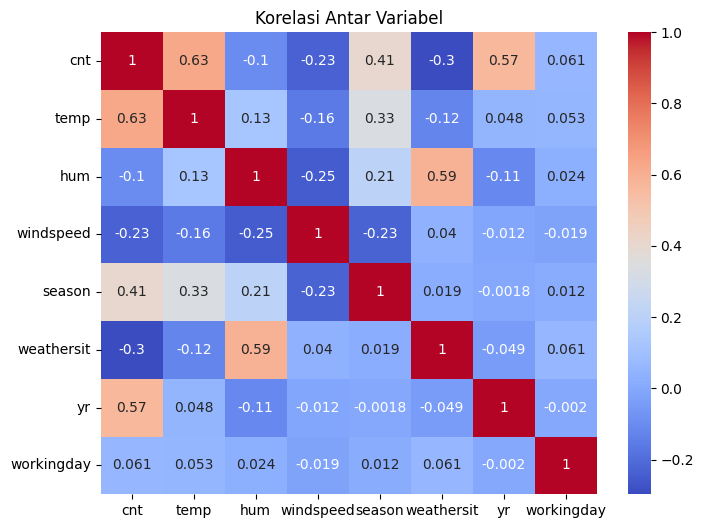

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variabel dependen (target)
y = df['cnt']

# Variabel independen (fitur prediktor)
X = df[['temp', 'hum', 'windspeed', 'season', 'weathersit', 'yr', 'workingday']]
df.head()

# Cek korelasi antar variabel
plt.figure(figsize=(8,6))
sns.heatmap(df[['cnt', 'temp', 'hum', 'windspeed', 'season', 'weathersit', 'yr', 'workingday']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()


Keterangan Korelasi :


*   Warna merah → korelasi positif (semakin tinggi satu variabel, semakin tinggi variabel lainnya).
*   Warna biru → korelasi negatif (semakin tinggi satu variabel, semakin rendah variabel lainnya).
*   Nilai mendekati 1 atau -1 → hubungan sangat kuat.
*   Nilai mendekati 0 → hubungan lemah atau tidak ada hubungan.





Dari hasil korelasi pada heatmap, terlihat bahwa suhu (temp) berwarna merah dengan nilai korelasi tinggi terhadap jumlah penyewaan (cnt), yang berarti makin panas cuaca, makin banyak orang menyewa sepeda. Tahun (yr) juga tampak merah muda, menunjukkan tren peningkatan penyewaan setiap tahunnya. Sebaliknya, cuaca (weathersit) dan kecepatan angin (windspeed) terlihat biru, menandakan hubungan negatif, saat cuaca buruk atau angin kencang, penyewaan menurun. Sementara itu, warna biru muda pada kelembapan (hum) dan hari kerja (workingday) menunjukkan pengaruhnya sangat kecil terhadap jumlah penyewaan sepeda.

**6. PEMBAGIAN DATA TRAINING DAN TESTING**

Kode di bawah ini digunakan buat membagi data jadi dua bagian, yaitu data untuk melatih model (training) dan data untuk menguji model (testing).


*   Pertama, variabel y diisi dengan kolom cnt, yaitu jumlah penyewaan sepeda (sebagai target yang mau diprediksi).
*   Lalu, variabel X berisi beberapa fitur seperti temp, hum, windspeed, season, weathersit, yr, dan workingday (sebagai faktor yang memengaruhi jumlah penyewaan).
*   Fungsi train_test_split() kemudian memisahkan data jadi 80% untuk training dan 20% untuk testing.
*   Parameter random_state=42 dipakai supaya hasil pembagian datanya selalu sama setiap dijalankan.









In [7]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df["cnt"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df[['temp', 'hum', 'windspeed', 'season', 'weathersit', 'yr', 'workingday']]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #random_state supaya hasil konsisten
)

# cetak pembagian data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

# Cetak apakah sudah ada constant pada data training
X_train.head()

Jumlah data train : 584
Jumlah data test : 147


,temp,hum,windspeed,season,weathersit,yr,workingday
682,0.343333,0.662917,0.342046,4,2,1,1
250,0.633913,0.939565,0.192748,3,3,0,1
336,0.299167,0.612917,0.095783,4,1,0,0
260,0.507500,0.695000,0.178483,3,1,0,0
543,0.697500,0.360000,0.271775,3,1,1,1


Artinya, dari total 731 data, sebanyak 584 baris dipakai untuk melatih model dan 147 baris sisanya untuk menguji hasil prediksi.

Bagian terakhir (X_train.head()) menampilkan beberapa baris pertama dari data training, berisi nilai-nilai fitur seperti suhu, kelembapan, kecepatan angin, dan lainnya yang akan dipakai sebagai masukan untuk model machine learning di bawah.

**7. PEMBUATAN MODEL MULTIPLE LINEAR REGRESSION (OLS)**

Kode di bawah ini dipakai buat menambahkan konstanta (bias) ke data training sebelum dipakai dalam model regresi.

Secara default, model regresi di statsmodels butuh ada kolom konstanta supaya bisa menghitung intercept, yaitu nilai awal prediksi ketika semua variabel lainnya bernilai nol.

In [8]:
# Tambahkan konstanta
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,temp,hum,windspeed,season,weathersit,yr,workingday
682,1.0,0.343333,0.662917,0.342046,4,2,1,1
250,1.0,0.633913,0.939565,0.192748,3,3,0,1
336,1.0,0.299167,0.612917,0.095783,4,1,0,0
260,1.0,0.507500,0.695000,0.178483,3,1,0,0
543,1.0,0.697500,0.360000,0.271775,3,1,1,1


Baris line 4 ini menambahkan kolom baru bernama const dengan nilai 1.0 di setiap baris data. Kolom ini nantinya berfungsi sebagai intercept dalam persamaan regresi.

Hasil output yang ditampilkan lewat X_train_const.head() menunjukkan data training yang sudah ditambah kolom const di paling kiri. Jadi sekarang setiap baris punya nilai const = 1.0 diikuti oleh fitur-fitur lain seperti temp, hum, windspeed, season, weathersit, yr, dan workingday.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Kode di bawah ini digunakan buat membangun model regresi linear sederhana menggunakan metode Ordinary Least Squares (OLS) dari library statsmodels. Tujuannya adalah untuk melihat seberapa besar pengaruh masing-masing variabel seperti suhu, kelembapan, kecepatan angin, dan lainnya terhadap jumlah penyewaan sepeda (cnt).

In [9]:
# Tambahkan konstanta agar model memiliki intercept
X_train_const = sm.add_constant(X_train)

# Buat dan latih model OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_const).fit()

# Tampilkan ringkasan hasil model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     293.3
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          2.97e-185
Time:                        15:59:39   Log-Likelihood:                -4798.8
No. Observations:                 584   AIC:                             9614.
Df Residuals:                     576   BIC:                             9649.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1630.7107    256.626      6.354      0.0

Dari hasil model regresi OLS, didapat nilai R-squared sebesar 0.781, artinya sekitar 78% variasi jumlah penyewaan sepeda dapat dijelaskan oleh variabel-variabel yang digunakan. Semua variabel punya pengaruh signifikan karena nilai p-value-nya di bawah 0.05. Variabel suhu (temp) dan tahun (yr) memberikan pengaruh positif paling besar terhadap jumlah penyewaan, sedangkan kelembapan (hum), kecepatan angin (windspeed), dan kondisi cuaca (weathersit) berpengaruh negatif. Secara keseluruhan, model ini cukup baik dalam menjelaskan hubungan antara faktor cuaca dan tren penyewaan sepeda.

**8. PREDIKSI DAN EVALUASI MODEL**

Kode di bawah ini digunakan buat mengevaluasi seberapa bagus model regresi bekerja dalam memprediksi data baru (data test).

pada kode di bawah ini juga pada sm.add_constant(X_test) menambahkan kolom konstanta ke data uji agar formatnya sama dengan data training. Lalu model.predict(X_test_const) digunakan untuk memprediksi jumlah penyewaan sepeda (y_pred) berdasarkan fitur-fitur pada data test.

In [10]:
# Tambahkan konstanta ke data test
X_test_const = sm.add_constant(X_test)

# Prediksi menggunakan model
y_pred = model.predict(X_test_const)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluasi Model ===")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")



=== Evaluasi Model ===
MAE  : 642.08
MSE  : 731731.13
RMSE : 855.41
R²   : 0.818


Dari di atas didapatkan :
*   MAE (Mean Absolute Error) = 642.08 → rata-rata selisih antara nilai sebenarnya dan hasil prediksi sekitar 642 unit penyewaan.
*   MSE (Mean Squared Error) = 731,731.13 → menunjukkan rata-rata kesalahan kuadrat, makin kecil makin baik.
*   RMSE (Root Mean Squared Error) = 855.41 → ukuran rata-rata error model dalam satuan yang sama dengan data aslinya.
*   R² = 0.818 → berarti sekitar 81,8% variasi data aktual bisa dijelaskan oleh model, menunjukkan bahwa model memiliki performa yang cukup baik dalam memprediksi jumlah penyewaan sepeda.

**9. VISUALISASI HASIL PREDIKSI**

Kode di bawah digunakan untuk membandingkan hasil prediksi model dengan data aktual menggunakan grafik scatter plot.

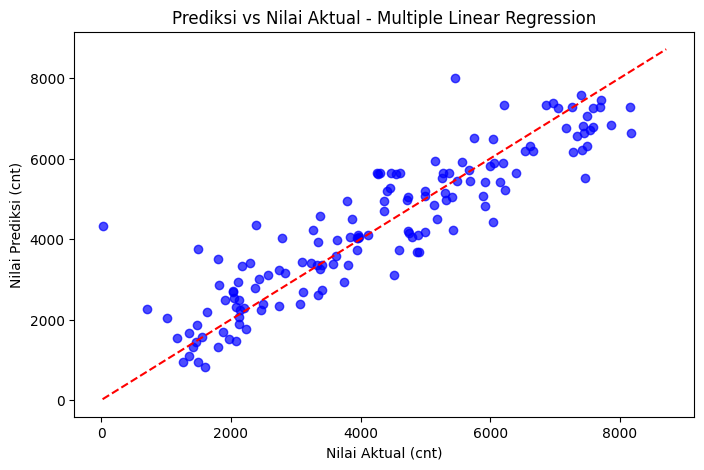

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Prediksi vs Nilai Aktual - Multiple Linear Regression")
plt.show()

Bagian plt.scatter(y_test, y_pred, ...) menampilkan titik-titik biru yang menunjukkan hubungan antara nilai aktual (y_test) dan hasil prediksi (y_pred) dari model regresi. Sementara plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') menggambar garis merah putus-putus sebagai garis ideal — di mana prediksi sama persis dengan nilai aslinya.

Pada grafik di atas, hasilnya sebagian besar titik biru berada dekat dengan garis merah, yang berarti model regresi sudah cukup baik dalam memprediksi jumlah penyewaan sepeda. Semakin rapat titik-titik dengan garis merah, semakin akurat prediksi model tersebut.